In [1]:
import pandas as pd
import math
import statistics
import copy
import matplotlib.pyplot as plt

In [2]:
alldata_total = pd.read_csv('/Users/Tim/Downloads/alldata_total.csv')
alldata_total = alldata_total.drop(columns=['Unnamed: 0'])

In [5]:
getNet(reformat(alldata_total)).to_csv("net_alldata.csv")

## Rolling window - best avg correlation

In [4]:
## Calculating avg correlation with winning and returning average
def avgCorr(data):
    corr_cols = ['PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'OFF_RATING',
       'DEF_RATING', 'NET_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO',
       'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'PACE', 'PACE_PER40', 'POSS', 'PIE', 'KEY_DNP',
       'GAME_NUMBER','HOME']

    corrs = []
    for i in range(len(corr_cols)):
        temp = data['WL'].corr(data[corr_cols[i]])
        corrs.append(temp)
    avg = 0
    for i in corrs:
        avg += abs(i)
    return avg/len(corr_cols)

In [5]:
## Calculating average correlation with winning and returning correlations
def avgCorr2(data):
    corr_cols = ['PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'OFF_RATING',
       'DEF_RATING', 'NET_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO',
       'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'PACE', 'PACE_PER40', 'POSS', 'PIE', 'KEY_DNP',
       'GAME_NUMBER','HOME']

    corrs = []
    for i in range(len(corr_cols)):
        temp = data['WL'].corr(data[corr_cols[i]])
        corrs.append(temp)
    return corrs

In [6]:
avgCorr(alldata_total)

0.25011859748483767

In [7]:
## makes net columns, drops other columns, returns avg correlation of net (or top if con=true) columns
def avgNetCorr(data, con = False):
    nethome = ['PTS', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTA', 'OREB', 'DREB',
       'REB', 'STL', 'BLK', 'TOV', 'PF', 'OFF_RATING',
       'DEF_RATING', 
       'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'PIE', 'KEY_DNP',
       'GAME_NUMBER']
           
    netaway = ['PTS_opp', 'FG_PCT_opp', 'FG3M_opp', 'FG3A_opp',
       'FG3_PCT_opp', 'FTA_opp', 'OREB_opp', 'DREB_opp', 'REB_opp', 'STL_opp', 'BLK_opp',
       'TOV_opp', 'PF_opp', 'OFF_RATING_opp', 'DEF_RATING_opp',
       'OREB_PCT_opp', 'DREB_PCT_opp', 'REB_PCT_opp',
       'TM_TOV_PCT_opp', 'EFG_PCT_opp', 'TS_PCT_opp', 'PIE_opp', 'KEY_DNP_opp',
       'GAME_NUMBER_opp']
    
    consider = ['NET_PTS', 'NET_FG_PCT', 'NET_FG3M', 'NET_FG3_PCT', 'NET_DREB', 'NET_REB', 'NET_BLK',
               'NET_OFF_RATING', 'NET_DEF_RATING', 'NET_REB_PCT', 'NET_EFG_PCT', 'NET_TS_PCT', 'NET_PIE']
    
    net_colnames = []

    for i in range(len(nethome)):
        temp = "NET_"+nethome[i]
        net_colnames.append(temp)
        
    alldata_total_net = copy.deepcopy(data)

    for i in range(len(net_colnames)):
        alldata_total_net[net_colnames[i]] = alldata_total_net[nethome[i]] - alldata_total_net[netaway[i]]

    alldata_total_net = alldata_total_net.drop(columns=nethome)
    alldata_total_net = alldata_total_net.drop(columns=netaway)
    alldata_total_net = alldata_total_net[alldata_total_net['HOME']==1]
    
    corr_net = ['NET_PTS', 'NET_FG_PCT', 'NET_FG3M', 'NET_FG3A',
       'NET_FG3_PCT', 'NET_FTA', 'NET_OREB', 'NET_DREB', 'NET_REB', 'NET_STL',
       'NET_BLK', 'NET_TOV', 'NET_PF', 'NET_OFF_RATING', 'NET_DEF_RATING',
       'NET_OREB_PCT', 'NET_DREB_PCT', 'NET_REB_PCT', 'NET_TM_TOV_PCT',
       'NET_EFG_PCT', 'NET_TS_PCT', 'NET_PIE', 'NET_KEY_DNP',
       'NET_GAME_NUMBER']
    corrs = []
    
    if con==False:
        for i in range(len(corr_net)):
            temp = alldata_total_net['WL'].corr(alldata_total_net[corr_net[i]])
            corrs.append(temp)
        avg = 0
        for i in corrs:
            avg += abs(i)
        return avg/len(corr_net)
    if con==True:
        for i in range(len(consider)):
            temp = alldata_total_net['WL'].corr(alldata_total_net[consider[i]])
            corrs.append(temp)
        avg = 0
        for i in corrs:
            avg += abs(i)
        return avg/len(consider)
        


In [11]:
avgNetCorr(alldata_total, True)

0.5818106088128858

In [12]:
abr = list(alldata_total.TEAM_ABBREVIATION.unique())

teams = list(alldata_total.TEAM_NAME.unique())

In [13]:
#changes values in df to being average of previous "length" games, returns updated dataframe
def sliding_window(data, length):
    
    needed_cols = ['MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'OFF_RATING',
       'DEF_RATING', 'NET_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO',
       'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'PACE', 'PACE_PER40', 'POSS', 'PIE', 'PTS_opp',
       'FG_PCT_opp', 'FG3M_opp', 'FG3A_opp', 'FG3_PCT_opp', 'OREB_opp',
       'DREB_opp', 'REB_opp', 'STL_opp', 'BLK_opp', 'TOV_opp', 'PF_opp',
       'OFF_RATING_opp', 'DEF_RATING_opp', 'NET_RATING_opp', 'OREB_PCT_opp',
       'DREB_PCT_opp', 'REB_PCT_opp', 'TM_TOV_PCT_opp', 'EFG_PCT_opp',
       'TS_PCT_opp', 'PIE_opp', 'WIN_PERC']

    alldata_avg = copy.deepcopy(data[data['TEAM_ABBREVIATION'] == abr[0]].reset_index(drop=True))
    temp = copy.deepcopy(data[data['TEAM_ABBREVIATION'] == abr[0]].reset_index(drop=True))

    
    #does it for first team, first only up to length, then for rest of data
    for i in range(1,(length-1)):
        for col in needed_cols:
            alldata_avg.loc[i,col] = statistics.mean(temp[col][0:i])


    for i in range(length,len(alldata_avg)):
        for col in needed_cols:
            alldata_avg.loc[i,col] = statistics.mean(temp[col][i-length:i])

    alldata_avg = alldata_avg[1:]

    ## does it for all other teams
    for team in abr[1:]:
        temp = copy.deepcopy(alldata_total[alldata_total['TEAM_ABBREVIATION'] == team].reset_index(drop=True))
        temp2 = copy.deepcopy(alldata_total[alldata_total['TEAM_ABBREVIATION'] == team].reset_index(drop=True))

        for i in range(1,(length-1)):
            for col in needed_cols:
                temp2.loc[i,col] = statistics.mean(temp[col][0:i])

        for i in range(length,len(temp)):
            for col in needed_cols:
                temp2.loc[i,col] = statistics.mean(temp[col][i-length:i])

        alldata_avg = pd.concat([alldata_avg, temp2[1:]]).reset_index(drop=True)
    return alldata_avg

In [14]:
window_corrs = []
window_corrs_high = []

for i in range(1,83):
    temp = sliding_window(alldata_total,i)
    window_corrs.append(avgNetCorr(temp))
    window_corrs_high.append(avgNetCorr(temp, True))

In [243]:
window_corrs

[0.051127505312719514,
 0.07004065403017377,
 0.08074016521182718,
 0.09056822682366872,
 0.09371226502629727,
 0.09595286873034355,
 0.09890652709243046,
 0.10070475229509712,
 0.10438346942410182,
 0.10587807184505027,
 0.10702754378972375,
 0.10977119698383249,
 0.11060158900742674,
 0.11054921288110742,
 0.11335386649139269,
 0.11425885313075067,
 0.11451536870606688,
 0.11450230381521702,
 0.11651353359838801,
 0.11832787157418136,
 0.11931903203885824,
 0.12005490716939864,
 0.11976808730878859,
 0.11973163863044822,
 0.12117783555066308,
 0.12231843489547646,
 0.12192321824289876,
 0.1219014657041429,
 0.12233721592502911,
 0.12261840732164568,
 0.12352369860562538,
 0.1242170451596142,
 0.12441043333871943,
 0.12502383784761073,
 0.12439360759108409,
 0.12576231217604503,
 0.1253116940342939,
 0.12553212796278043,
 0.12508821495363417,
 0.1254295762767535,
 0.1254852504263016,
 0.12576969218967507,
 0.12567217850777157,
 0.12584271033530883,
 0.12491747905849004,
 0.12504771869

In [244]:
window_corrs_high

[0.0723385719993948,
 0.10056048493949742,
 0.1163530411988834,
 0.1336167565817244,
 0.13888776446398238,
 0.14184507959263973,
 0.14685110778001947,
 0.14958530262822756,
 0.15424378935092664,
 0.15692555533464733,
 0.15836762720090897,
 0.1604171413643314,
 0.16354626585823667,
 0.16219847586941075,
 0.16681260323524094,
 0.16791879675411103,
 0.1676935102254084,
 0.16910592828602974,
 0.17123412836717428,
 0.1740702496034851,
 0.17584469201051578,
 0.176178502190393,
 0.17800052087129326,
 0.17616320560304308,
 0.1781711293480832,
 0.17888857075226602,
 0.1786273677067453,
 0.17805303281847346,
 0.17999100707400453,
 0.18032135486252068,
 0.18134320930523934,
 0.18187717376693546,
 0.18337330813029237,
 0.183376676567825,
 0.18343039163581518,
 0.1849875588570257,
 0.183419942407549,
 0.18366143034722676,
 0.18336207655571196,
 0.1837887066219342,
 0.18397849613077183,
 0.18427637659661963,
 0.18461209599257208,
 0.1851844519965614,
 0.18377912615241312,
 0.18299788302717787,
 0.18

In [16]:
windows = []
for i in range(1,83):
    windows.append(i)
    if window_corrs[i-1] == max(window_corrs):
        print("Max all:", i-1)
    if window_corrs_high[i-1] == max(window_corrs_high):
        print("Max some:", i-1)

Max all: 50
Max some: 50


Text(0.5, 1.0, 'Optimal Sliding Window Length')

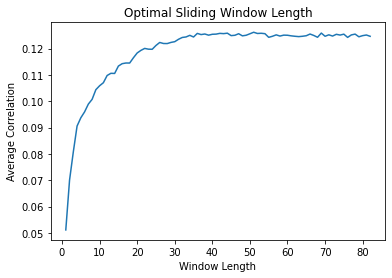

In [19]:
plt.plot(windows, window_corrs)
plt.xlabel("Window Length")
plt.ylabel("Average Correlation")
plt.title("Optimal Sliding Window Length")

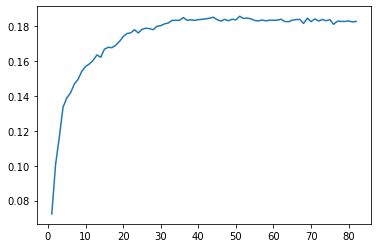

In [18]:
plt.plot(windows, window_corrs_high)

## Decay

In [20]:
## calculates exponentially weighted average for all values, using rate as decay rate
def ewma(data, rate):
    
    needed_cols = ['MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'OFF_RATING',
       'DEF_RATING', 'NET_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO',
       'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT',
       'PACE', 'PACE_PER40', 'POSS', 'PIE', 'PTS_opp',
       'FG_PCT_opp', 'FG3M_opp', 'FG3A_opp', 'FG3_PCT_opp', 'OREB_opp',
       'DREB_opp', 'REB_opp', 'STL_opp', 'BLK_opp', 'TOV_opp', 'PF_opp',
       'OFF_RATING_opp', 'DEF_RATING_opp', 'NET_RATING_opp', 'OREB_PCT_opp',
       'DREB_PCT_opp', 'REB_PCT_opp', 'TM_TOV_PCT_opp', 'EFG_PCT_opp',
       'TS_PCT_opp', 'PIE_opp', 'WIN_PERC']

    alldata_avg = copy.deepcopy(data[data['TEAM_ABBREVIATION'] == abr[0]].reset_index(drop=True))
    temp = copy.deepcopy(data[data['TEAM_ABBREVIATION'] == abr[0]].reset_index(drop=True))
    
    #changes row 1 values to row 0 values for first team
    for col in needed_cols:
        alldata_avg.loc[1,col] = alldata_avg.loc[0,col]

    #calculates ewma for first team
    for i in range(2,len(alldata_avg)):
        for col in needed_cols:    
            alldata_avg.loc[i,col] = (temp.loc[i-1,col]*rate) + ((1-rate)*alldata_avg.loc[i-2,col])

    #drops first game
    alldata_avg = alldata_avg[1:]
    
    #does the same for rest of teams
    for team in abr[1:]:
        temp = copy.deepcopy(alldata_total[alldata_total['TEAM_ABBREVIATION'] == team].reset_index(drop=True))
        temp2 = copy.deepcopy(alldata_total[alldata_total['TEAM_ABBREVIATION'] == team].reset_index(drop=True))
        
        for col in needed_cols:
            temp.loc[1,col] = temp.loc[0,col]
            
        for i in range(2,len(temp)):
            for col in needed_cols:    
                temp.loc[i,col] = (temp2.loc[i-1,col]*rate) + ((1-rate)*temp.loc[i-2,col])


        alldata_avg = pd.concat([alldata_avg, temp[1:]]).reset_index(drop=True)
    return alldata_avg

In [124]:
test = ewma(alldata_total, 0.1)

In [21]:
decay_corrs = []
decay_corrs_high = []

for i in range(0,100):
    r = i/100
    temp = ewma(alldata_total,r)
    decay_corrs.append(avgNetCorr(temp))
    decay_corrs_high.append(avgNetCorr(temp, True))

In [250]:
decay_corrs

[0.02527786418079295,
 0.07175948057338269,
 0.09626624990945516,
 0.10553785883893756,
 0.10965320858461876,
 0.11157009749234897,
 0.1123415851643809,
 0.11244346760220064,
 0.11212874933512157,
 0.11154531384942257,
 0.11078471503259685,
 0.10990597806485032,
 0.10894842794724151,
 0.10793902949886953,
 0.10689675283537671,
 0.10583524535534743,
 0.10476450798108843,
 0.10369197219319598,
 0.10262320961667898,
 0.10156241225395024,
 0.10051272684904483,
 0.09947649448130193,
 0.09845542705763743,
 0.09745074061634508,
 0.0964632581876053,
 0.09549349054881977,
 0.09454170047389775,
 0.09360795434850767,
 0.09269216391313928,
 0.09179412016469157,
 0.09091352095172411,
 0.0900499934517579,
 0.08920311246840541,
 0.08837241529936958,
 0.08755741378343197,
 0.08675760402273759,
 0.08597247418770626,
 0.0852015107401957,
 0.08444420335222362,
 0.08370004874982721,
 0.08296855367239325,
 0.08224923710542319,
 0.08154163191793244,
 0.08084528601351419,
 0.08015976308570333,
 0.07948464305

In [251]:
decay_corrs_high

[0.024797911540422695,
 0.1007615392076239,
 0.1362115499551883,
 0.1507605521399788,
 0.15773892815989426,
 0.16129889939039138,
 0.16301521069526023,
 0.16362565974956686,
 0.16352942583461344,
 0.16296284612029674,
 0.16207450308901716,
 0.16096207808252572,
 0.15969216606430559,
 0.15831159359746616,
 0.15685416929805948,
 0.15534484992343772,
 0.15380238925328932,
 0.15224107050128183,
 0.15067187164012963,
 0.14910327186080669,
 0.14754182569462193,
 0.14599258300746776,
 0.14445940402713509,
 0.14294520087337304,
 0.14145212615887548,
 0.1399817224289532,
 0.13853504190445817,
 0.1371127432215264,
 0.13571517003885988,
 0.1343424151535926,
 0.1329943729135782,
 0.13167078210420252,
 0.13037126103927638,
 0.12909533624671593,
 0.127842465877819,
 0.12661205876270484,
 0.12540348986970312,
 0.12421611279336639,
 0.12304926978739122,
 0.1219022997699537,
 0.1207745446559467,
 0.11966535431035906,
 0.1185740903672097,
 0.11750012911716683,
 0.11644286363272194,
 0.11540170527131953,

In [23]:
rates = []
for i in range(0,100):
    rates.append(i)
    if decay_corrs[i] == max(decay_corrs):
        print("Max all:", i)
    if decay_corrs_high[i] == max(decay_corrs_high):
        print("Max some:", i)

Max all: 7
Max some: 7


Text(0.5, 1.0, 'Optimal EWMA Degree of Mixing')

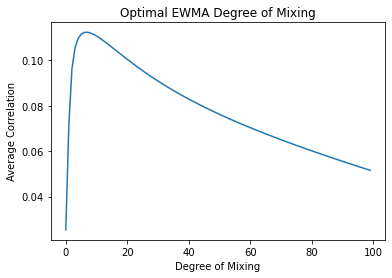

In [24]:
plt.plot(rates, decay_corrs)
plt.xlabel("Degree of Mixing")
plt.ylabel("Average Correlation")
plt.title("Optimal EWMA Degree of Mixing")

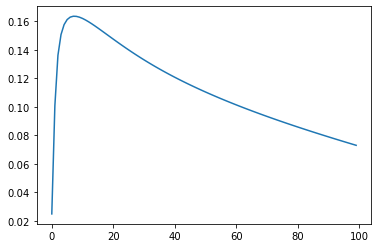

In [254]:
plt.plot(rates, decay_corrs_high)

In [18]:
sliding_window_50 = sliding_window(alldata_total, 50)

In [19]:
ewma_7 = ewma(alldata_total, 0.07)

In [3]:
# reformats data to being 1 row / game
def reformat(data):
    dataH = data[data['HOME'] == 1] 
    dataA = data[data['HOME'] == 0] 

    data1 = pd.merge(dataH, dataA, how="inner", left_on=['GAME_ID'], right_on = ['GAME_ID'])

    data1 = data1.sort_values(by='GAME_DATE_x').reset_index(drop=True)
    
    return data1

In [21]:
## calculates net values for each game, drops other columns
def getNet(data):
    homestats = [
     'MIN_x','PTS_x','FGM_x','FGA_x','FG_PCT_x','FG3M_x','FG3A_x','FG3_PCT_x','FTM_x','FTA_x','FT_PCT_x','OREB_x',
     'DREB_x','REB_x','AST_x','STL_x','BLK_x','TOV_x','PF_x','PLUS_MINUS_x','OFF_RATING_x','DEF_RATING_x','NET_RATING_x',
     'AST_PCT_x','AST_TOV_x','AST_RATIO_x','OREB_PCT_x','DREB_PCT_x','REB_PCT_x','TM_TOV_PCT_x','EFG_PCT_x',
     'TS_PCT_x','PACE_x','PACE_PER40_x','POSS_x','PIE_x','KEY_DNP_x','GAME_NUMBER_x','PTS_opp_x',
     'FG_PCT_opp_x','FG3M_opp_x','FG3A_opp_x','FG3_PCT_opp_x','OREB_opp_x','DREB_opp_x','REB_opp_x','STL_opp_x',
     'BLK_opp_x','TOV_opp_x','PF_opp_x','OFF_RATING_opp_x','DEF_RATING_opp_x','NET_RATING_opp_x','OREB_PCT_opp_x',
     'DREB_PCT_opp_x','REB_PCT_opp_x','TM_TOV_PCT_opp_x','EFG_PCT_opp_x','TS_PCT_opp_x','PIE_opp_x','HOME_x',
     'WIN_PERC_x', 'FTA_opp_x', 'KEY_DNP_opp_x', 'GAMES_PLAYED_7_x', 'rest_x']

    awaystats = [
     'MIN_y','PTS_y','FGM_y','FGA_y','FG_PCT_y','FG3M_y','FG3A_y','FG3_PCT_y','FTM_y','FTA_y','FT_PCT_y','OREB_y',
     'DREB_y','REB_y','AST_y','STL_y','BLK_y','TOV_y','PF_y','PLUS_MINUS_y','OFF_RATING_y','DEF_RATING_y','NET_RATING_y',
     'AST_PCT_y','AST_TOV_y','AST_RATIO_y','OREB_PCT_y','DREB_PCT_y','REB_PCT_y','TM_TOV_PCT_y','EFG_PCT_y',
     'TS_PCT_y','PACE_y','PACE_PER40_y','POSS_y','PIE_y','KEY_DNP_y','GAME_NUMBER_y','PTS_opp_y',
     'FG_PCT_opp_y','FG3M_opp_y','FG3A_opp_y','FG3_PCT_opp_y','OREB_opp_y','DREB_opp_y','REB_opp_y','STL_opp_y',
     'BLK_opp_y','TOV_opp_y','PF_opp_y','OFF_RATING_opp_y','DEF_RATING_opp_y','NET_RATING_opp_y','OREB_PCT_opp_y',
     'DREB_PCT_opp_y','REB_PCT_opp_y','TM_TOV_PCT_opp_y','EFG_PCT_opp_y','TS_PCT_opp_y','PIE_opp_y','HOME_y',
     'WIN_PERC_y', 'FTA_opp_y', 'KEY_DNP_opp_y', 'GAMES_PLAYED_7_y', 'rest_y']
    
    net_colnames = []

    for i in range(len(homestats)):
        temp = "NET_"+homestats[i][:-2]
        net_colnames.append(temp)
        
    netData = copy.deepcopy(data)

    for i in range(len(net_colnames)):
        netData[net_colnames[i]] = netData[homestats[i]] - netData[awaystats[i]]
    
    netData = netData.drop(columns=homestats)
    netData = netData.drop(columns=awaystats)
    
    return netData

In [22]:
sliding_window_50 = getNet(reformat(sliding_window_50))

In [26]:
ewma_7 = getNet(reformat(ewma_7))

In [27]:
sliding_window_50.to_csv('sliding_window_50.csv')
ewma_7.to_csv('ewma_7.csv')

In [291]:
ewma_7.to_csv("ewma_7_2.csv")